In [ ]:
!pip install feature-extractor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install vgg16_extractor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement vgg16_extractor (from versions: none)
ERROR: No matching distribution found for vgg16_extractor


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import time
import requests
import numpy as np
from io import BytesIO
import torch
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import random_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from pathlib import Path
from PIL import Image
from torchvision import datasets, transforms

from PIL import ImageOps
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

import cv2
from google.colab.patches import cv2_imshow



In [ ]:
latent_dim = 13872

class Autoencoder(Model):
  def __init__(self, encoding_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(1, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [ ]:
import os
root = os.path.join(os.getcwd(), "drive", "MyDrive", "Colab Notebooks", "crawl_image")
root

'/content/drive/MyDrive/Colab Notebooks/crawl_image'

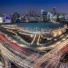

In [ ]:
#img_path = '/crawl_image/동대문디자인플라자.png'
img_path = os.path.join(root, "동대문디자인플라자.png")

img = cv2.imread(img_path)

cv2_imshow(img)

In [ ]:
img.shape

(68, 68, 3)

In [ ]:
class FeatureExtractor:
  def __init__(self):
    # Use VGG-16 as the architecture and ImageNet for the weight
        base_model = VGG16(weights='imagenet')
        # Customize the model to return features from fully-connected layer
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)
  def extract(self, img):
    # Resize the image
      img = img.resize((224, 224))
      # Convert the image color space
      img = img.convert('RGB')
      # Reformat the image
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
      x = preprocess_input(x)
      # Extract Features
      feature = self.model.predict(x)[0]
      return feature / np.linalg.norm(feature)


In [ ]:
print(img_path)

/content/drive/MyDrive/Colab Notebooks/crawl_image/동대문디자인플라자.png


In [ ]:
img=Image.open(img_path)


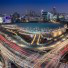

In [ ]:
img

In [ ]:
img1 = Image.open(img_path)
img1.show()
img1_size = img1.size

print(img1_size)

(68, 68)


In [ ]:
f_root = os.path.join(os.getcwd(), "drive", "MyDrive", "Colab Notebooks")
f_root

'/content/drive/MyDrive/Colab Notebooks'

In [ ]:
q_root = os.path.join(os.getcwd(), "drive", "MyDrive", "Colab Notebooks","query")
q_root

'/content/drive/MyDrive/Colab Notebooks/query'

In [ ]:
query_root = os.path.join(q_root, "reverse_lo.jpg")

In [ ]:
import cv2
from PIL import ImageOps
img2 = Image.open(query_root)
# expand = cv2.resize(image, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)
# plt.imshow(cv2.cvtColor(expand, cv2.COLOR_BGR2RGB))
# plt.show()
size = 68,68
img2 = ImageOps.fit(img2, size, Image.ANTIALIAS)

print(img2.size)
img2.show()
# kk_size = img2.size
# print(kk_size)
# kk=cv2.resize(img2,(68,68))
# kk_size = kk.size
# print(kk_size)
# plt.imshow(cv2.cvtColor(kk, cv2.COLOR_BGR2RGB))
# plt.show()
# cv2.imshow("dst", dst)
# print(img2.width)
# print(img2.height)

# print(img2_size)

(68, 68)


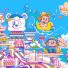

In [ ]:
img2

In [ ]:
feature_root = new_root = os.path.join(f_root, "feature_image")

In [ ]:
from pathlib import Path
for img_path in sorted(os.listdir(root)):
    # print(img_path)
    new_root = os.path.join(root, img_path)
    fe = FeatureExtractor()
    #Extract Features
    feature = fe.extract(img=Image.open(new_root))
    
    # # Save the Numpy array (.npy) on designated path
    feature_path = Path(feature_root) / (img_path + ".npy") 
    np.save(feature_path, feature)
print(feature)

553476096/553467096 [==============================] - 8s 0us/step
[0.00028639 0.04230769 0.         ... 0.01741595 0.         0.        ]


(68, 68)


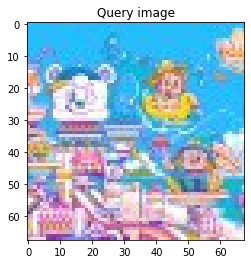

동대문디자인플라자.png
1.1712433


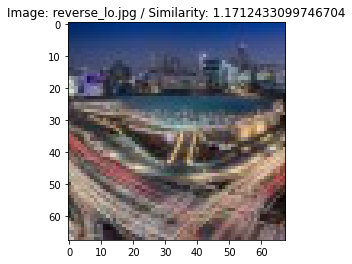

롯데월드 어드벤처.png
0.42570615


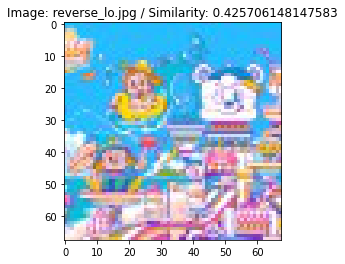

샤롯데씨어터.png
1.2112335


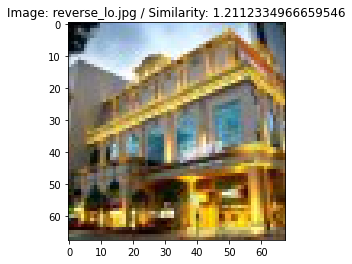

에버랜드.png
1.2128934


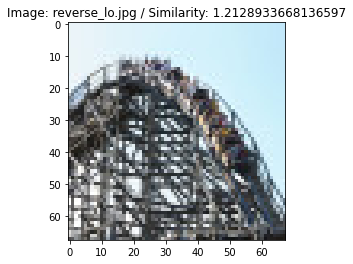

여의도 한강공원.png
1.1174579


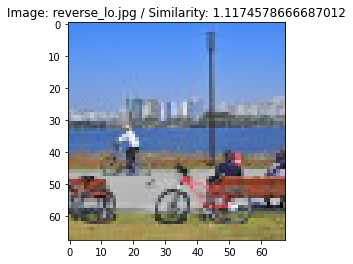

예술의전당한가람미술관.png
1.1733704


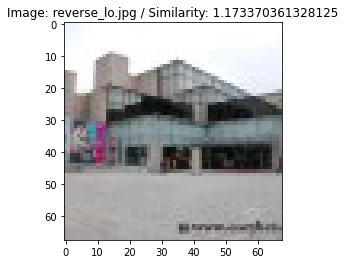

캐리비안베이.png
1.1717005


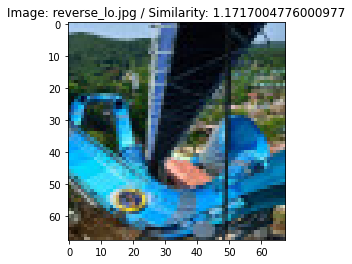

태종대.png
1.1851757


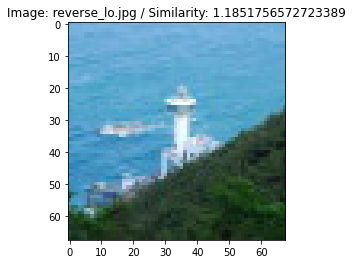

헤이리 예술마을.png
1.1608508


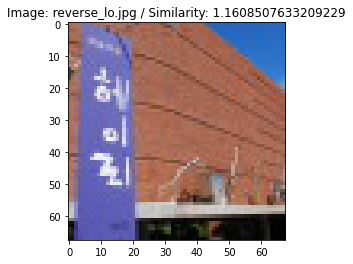

In [ ]:
# Import the libraries
import matplotlib.pyplot as plt
import numpy as np
list = []
def read_image(img_path):
  
    try:
      #print(img_path)
      response = requests.get(img_path)
      img_path = BytesIO(response.content)
    except:
      pass
    img = Image.open(img_path)
    return img

# Insert the image query
img = Image.open(query_root)
size = 68,68
img = ImageOps.fit(img, size, Image.ANTIALIAS)
print(img.size)
feature_path2=feature_path
# Extract its features
#query = vgg16_extractor(query_root)
query = fe.extract(img)
img_obj = read_image(query_root)
kk = ImageOps.fit(img_obj, size, Image.ANTIALIAS)
img_numpy = np.array(kk)
plt.imshow(img_numpy)
plt.title('Query image')
plt.show()

# Calculate the similarity (distance) between images
#print(feature_root)

for img_item in sorted(os.listdir(feature_root)):
      #print(img_item)
      feature_item = os.path.join(feature_root, img_item)
      new_item = os.path.join(root, img_item)
      kk=os.path.splitext(img_item)
      print(kk[0])
      new_item = os.path.join(root, kk[0])
      #Extract Features
      features = np.load(feature_item)
      #print(features)
    # feature_item = os.path.join(root, featuree)
    # features = fe.extract(img=Image.open(feature_item))

  #features = fe.extract(img=Image.open(new_root))

      dists = np.linalg.norm(features - query, axis=0)
      #print(dists[0])
      print(dists)
  #   #print(dists)
  # # # # Extract 30 images that have lowest distance
      ids = np.argsort(dists)[:10]
      #print(ids)
      scores = [(dists, new_item) for id in ids]
      for i, (score, path) in enumerate(scores):
        feature_obj = read_image(new_item)
        feature_numpy = np.array(feature_obj)
        plt.imshow(feature_numpy)
        text = f'Image: {os.path.basename(query_root)} / Similarity: {score}'
        plt.title(text)
        plt.show()

  

# for img_path in sorted(os.listdir(root)):
#   new_item = os.path.join(root, img_path)

#   scores = [(dists, new_item) for id in ids]
#   feature_obj = read_image(new_item)
#   feature_numpy = np.array(feature_obj)
#   plt.imshow(feature_numpy)
#   text = f'Image: {os.path.basename(query_root)} / Similarity: {score}'
#   plt.title(text)
#   plt.show()
  #print(query_root)

#   print(new_item)

# for i, (score, path) in enumerate(scores):
#   print(scores)
#   print(i,score)        
#   print(path)
#   # for i, (score, path) in enumerate(scores):
#   #   #print(scores)
#   #   #print(score)
#   #   #print(feature_path2)
#   #   feature_obj = read_image(path)
#   #   feature_numpy = np.array(feature_obj)
#   #   plt.imshow(feature_numpy)
#   #   text = f'Image: {os.path.basename(query_root)} / Similarity: {score}'
#   #   plt.title(text)
#   #   plt.show()


In [ ]:
query

array([0.0275965 , 0.0008719 , 0.03466253, ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [ ]:
# img=torch.Tensor(img)
# sample_x = img[0].unsqueeze(dim=0)
# print(sample_x.shape)
# # print(sample_x)
# mlp_ae = Lion_MNIST_MLP_Autoencoder()
# y = mlp_ae(sample_x)